# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [8]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [9]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 614


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [10]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
query_url = f"{url}appid={weather_api_key}&units={units}&q="
units = 'Imperial'

# Define an empty list to fetch the weather data for each city
city_data=[]

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url =  requests.get(query_url + city).json()

    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = city_url["weather"]

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_url["coord"]["lat"]
        city_lng = city_url["coord"]["lon"]
        city_max_temp = city_url["main"]["temp_max"]
        city_humidity = city_url["main"]["humidity"]
        city_clouds = city_url["clouds"]["all"]
        city_wind = city_url["wind"]["speed"]
        city_country = city_url["sys"]["country"]
        city_date = city_url["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------


Processing Record 1 of Set 1 | blackmans bay
Processing Record 2 of Set 1 | kapuskasing
Processing Record 3 of Set 1 | lebu
Processing Record 4 of Set 1 | ghardaia
Processing Record 5 of Set 1 | miles city
Processing Record 6 of Set 1 | alesund
Processing Record 7 of Set 1 | bethel
Processing Record 8 of Set 1 | yemva
Processing Record 9 of Set 1 | port elizabeth
Processing Record 10 of Set 1 | utrik
Processing Record 11 of Set 1 | west island
Processing Record 12 of Set 1 | wailua homesteads
Processing Record 13 of Set 1 | ryotsu-minato
Processing Record 14 of Set 1 | taiohae
City not found. Skipping...
Processing Record 15 of Set 1 | bikenibeu village
Processing Record 16 of Set 1 | grand falls-windsor
Processing Record 17 of Set 1 | iqaluit
Processing Record 18 of Set 1 | buala
Processing Record 19 of Set 1 | waitangi
Processing Record 20 of Set 1 | carnarvon
Processing Record 21 of Set 1 | puerto natales
Processing Record 22 of Set 1 | grytviken
Processing Record 23 of Set 1 | edin

In [11]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)


In [12]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,blackmans bay,-43.0167,147.3167,48.52,65,24,10.56,AU,1687925194
1,kapuskasing,49.4169,-82.4331,55.49,54,0,5.75,CA,1687925101
2,lebu,-37.6167,-73.6500,47.66,86,100,3.83,CL,1687924937
3,ghardaia,32.4909,3.6735,81.75,26,0,0.00,DZ,1687925196
4,miles city,46.4083,-105.8406,63.57,88,0,5.75,US,1687925196


In [13]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [14]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,blackmans bay,-43.0167,147.3167,48.52,65,24,10.56,AU,1687925194
1,kapuskasing,49.4169,-82.4331,55.49,54,0,5.75,CA,1687925101
2,lebu,-37.6167,-73.6500,47.66,86,100,3.83,CL,1687924937
3,ghardaia,32.4909,3.6735,81.75,26,0,0.00,DZ,1687925196
4,miles city,46.4083,-105.8406,63.57,88,0,5.75,US,1687925196


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

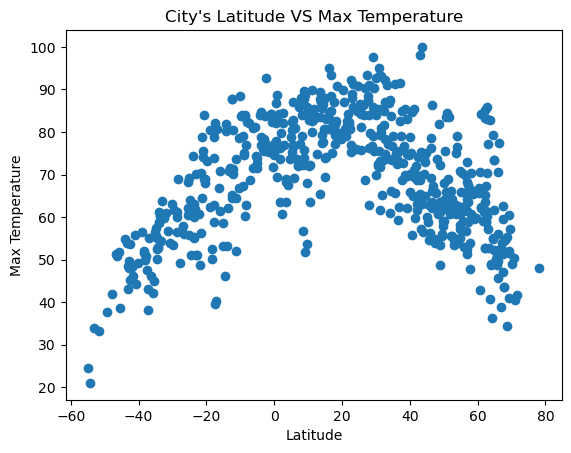

In [15]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df.iloc[:,1],city_data_df.iloc[:,3])
# Incorporate the other graph properties
plt.title("City's Latitude VS Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature")

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()
#### Latitude Vs. Humidity

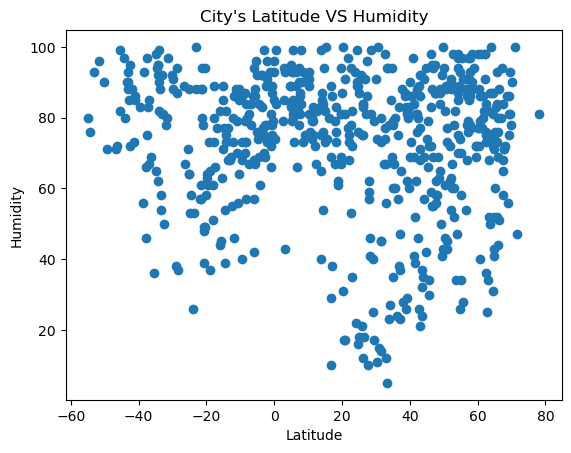

In [42]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df.iloc[:,1],city_data_df.iloc[:,4])

# Incorporate the other graph properties
plt.title("City's Latitude VS Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity")

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

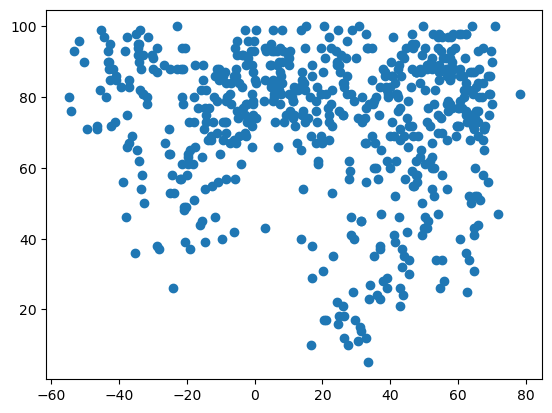

In [44]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df.iloc[:,1],city_data_df.iloc[:,4])

# Incorporate the other graph properties
plt.title("City's Latitude VS Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

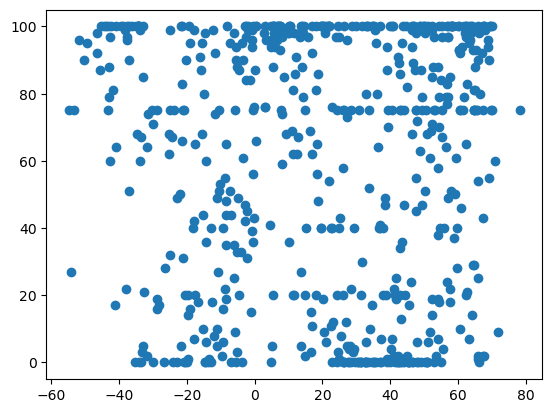

In [43]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df.iloc[:,1],city_data_df.iloc[:,5])

# Incorporate the other graph properties
plt.title("City's Latitude VS Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
def lin_regression(x_values, y_values, title)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
# plt.xlabel('')
# plt.ylabel('')
print(f"The r-squared is: {rvalue**2}")
plt.show()

In [23]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
north_hem = city_data_df.loc[city_data_df["Lat"] > 0]
north_hem.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,kapuskasing,49.4169,-82.4331,55.49,54,0,5.75,CA,1687925101
3,ghardaia,32.4909,3.6735,81.75,26,0,0.00,DZ,1687925196
4,miles city,46.4083,-105.8406,63.57,88,0,5.75,US,1687925196
5,alesund,62.4723,6.1549,58.91,90,0,5.75,NO,1687925196
6,bethel,41.3712,-73.4140,69.49,87,96,3.18,US,1687925103


In [28]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
south_hem = city_data_df.loc[city_data_df["Lat"] < 0]
# Display sample data
south_hem.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,blackmans bay,-43.0167,147.3167,48.52,65,24,10.56,AU,1687925194
2,lebu,-37.6167,-73.6500,47.66,86,100,3.83,CL,1687924937
8,port elizabeth,-33.9180,25.5701,61.11,97,40,14.97,ZA,1687925008
10,west island,-12.1568,96.8225,80.58,65,100,14.97,CC,1687925198
16,buala,-8.1450,159.5921,82.40,78,98,6.91,SB,1687925203


###  Temperature vs. Latitude Linear Regression Plot

The r-squared is: 0.646981113618354


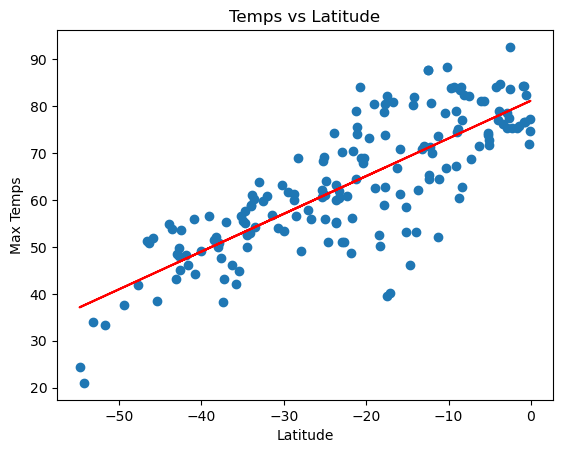

In [39]:
# Linear regression on Northern Hemisphere
x_values = north_hem['Lat']
y_values = north_hem['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,1))

plt.title('Temps vs Latitude')
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.xlabel('Latitude')
plt.ylabel('Max Temps')
print(f"The r-squared is: {rvalue**2}")
plt.show()

The r-squared is: 0.646981113618354


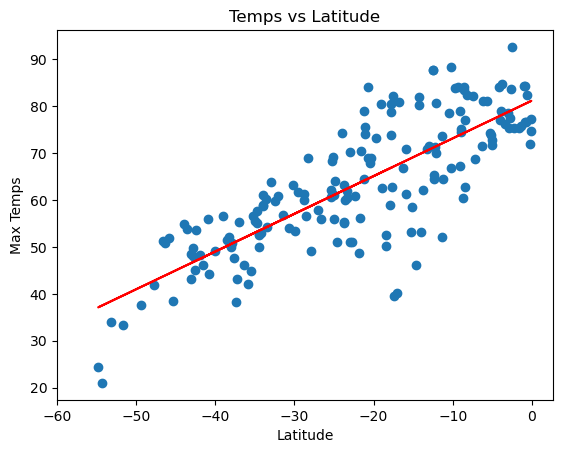

In [48]:
# Linear regression on Southern Hemisphere
x_values = south_hem['Lat']
y_values = south_hem['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.title('Temps vs Latitude')
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.xlabel('Latitude')
plt.ylabel('Max Temps')
plt.xticks([0,-10,-20,-30,-40,-50,-60], rotation=0)
print(f"The r-squared is: {rvalue**2}")
plt.show()

**Discussion about the linear relationship:** Expectedly, the temperatures across cities rise with proximity to the equatorial line, or 0 Lat.

### Humidity vs. Latitude Linear Regression Plot

The r-squared is: 0.02848715410634905


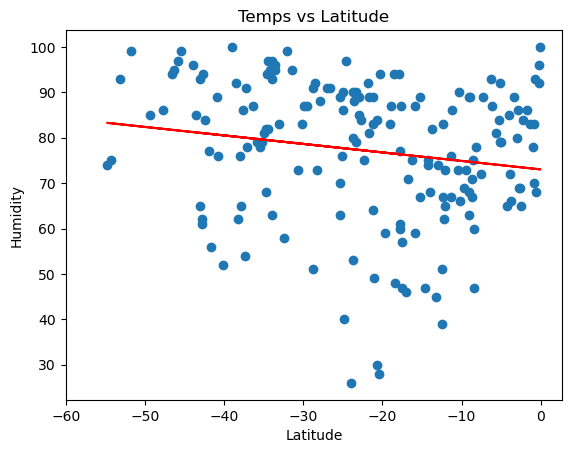

In [51]:
# Northern Hemisphere
x_values = north_hem['Lat']
y_values = north_hem['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.title('Humidity vs Latitude')
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.xticks([0,-10,-20,-30,-40,-50,-60], rotation=0)
print(f"The r-squared is: {rvalue**2}")
plt.show()

The r-squared is: 0.02848715410634905


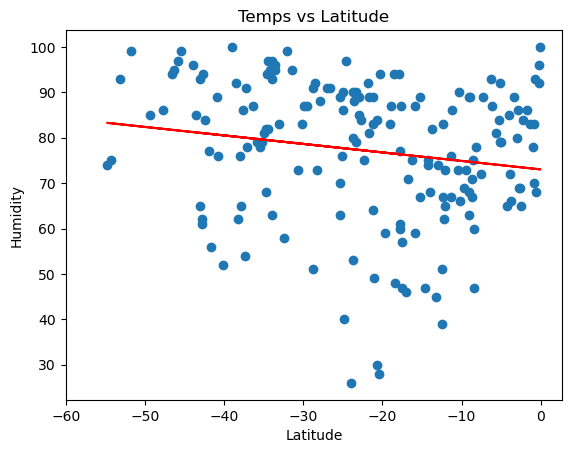

In [53]:
# Southern Hemisphere
x_values = south_hem['Lat']
y_values = south_hem['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.title('Humidity vs Latitude')
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.xticks([0,-10,-20,-30,-40,-50,-60], rotation=0)
print(f"The r-squared is: {rvalue**2}")
plt.show()

**Discussion about the linear relationship:** There does not seem to be much correlation between latitude of the city and humidity levels, although lower humidity levels seem to be found exclusively outside of the extreme latitudes in both Northern and Southern Hemispheres.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: -0.20776937243421156


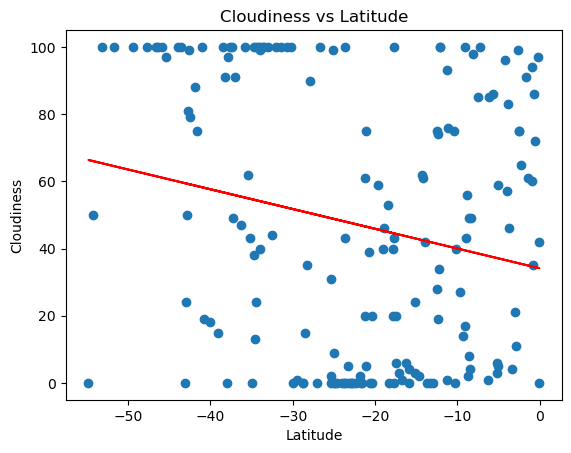

In [58]:
# Northern Hemisphere
x_values = north_hem['Lat']
y_values = north_hem['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.title('Cloudiness vs Latitude')
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
print(f"The r-value is: {rvalue}")
plt.show()

The r-value is: -0.20776937243421156


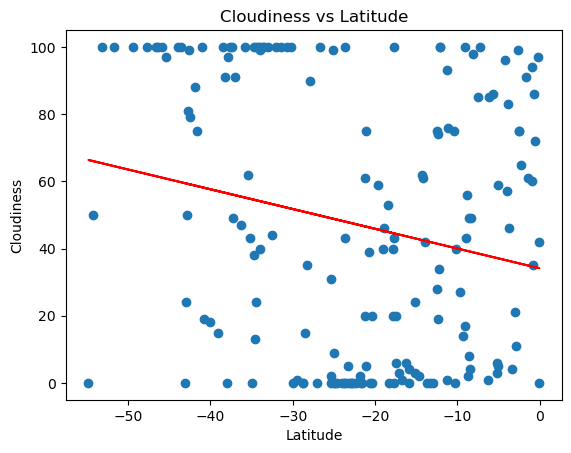

In [59]:
# Southern Hemisphere
x_values = south_hem['Lat']
y_values = south_hem['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.title('Cloudiness vs Latitude')
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
print(f"The r-value is: {rvalue}")
plt.show()

**Discussion about the linear relationship:** There is less cloudiness as latitude approaches 0, and a higher concentration of cloudy cities the farther the city is located in relation to the equator, with another cluster of very clear skyed cities between 30-0 degrees latitude, with some seeming outliers on both ends

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.030396762354449467


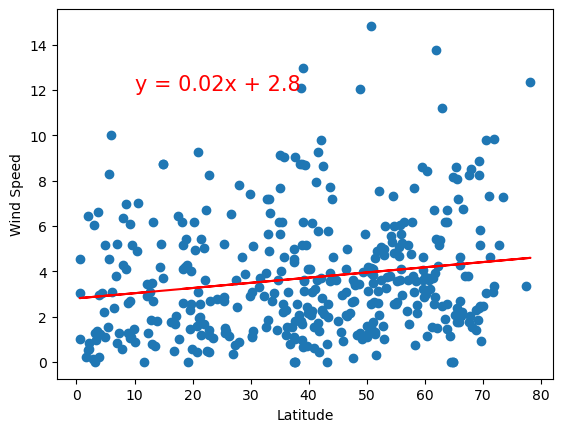

In [21]:
# Northern Hemisphere
# YOUR CODE HERE

The r-value is: 0.062239040700515696


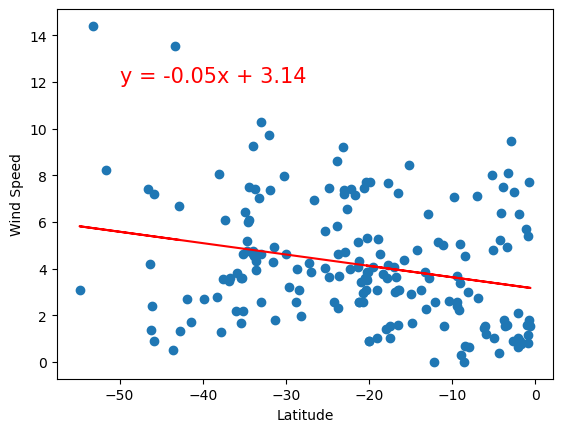

In [22]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE